<a href="https://colab.research.google.com/github/bing020815/Syracuse-University/blob/master/IST%20718/Project/IST718_BJW_for_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outline
* Outline:
    + Connect google drive and basic library setup for google Colab
    + KC 311 Calls
        - Load data 
        - Category Distribution
            - 2016-2019
            - 2018
        - Time Series analysis
            - 18 Time series data
            - Sarimax

### Connect google drive and basic library setup for google Colab

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy.stats
import pylab

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.api as sm
import itertools
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_rows', 1500)

### Load data

In [0]:
df_kc = pd.read_csv('/content/drive/My Drive/Syracuse/IST718/KC/311_Call_Center_Service_Requests.csv', parse_dates=['CREATION DATE'])

In [0]:
# convert df_kc to time series -->  df_kc_ts
df_kc_ts = df_kc.set_index('CREATION DATE')
df_kc_ts.index=pd.to_datetime(df_kc_ts.index)
df_kc_ts = df_kc_ts.loc['2016-01-01':'2019-12-31']
df_kc_1819 = df_kc_ts.loc['2018-01-01':'2019-12-31']

In [0]:
df_kc_ts.columns

Index(['CASE ID', 'SOURCE', 'DEPARTMENT', 'WORK GROUP', 'REQUEST TYPE',
       'CATEGORY', 'TYPE', 'DETAIL', 'CREATION TIME', 'CREATION MONTH',
       'CREATION YEAR', 'STATUS', 'EXCEEDED EST TIMEFRAME', 'CLOSED DATE',
       'CLOSED MONTH', 'CLOSED YEAR', 'DAYS TO CLOSE', 'STREET ADDRESS',
       'ADDRESS WITH GEOCODE', 'ZIP CODE', 'NEIGHBORHOOD', 'COUNTY',
       'COUNCIL DISTRICT', 'POLICE DISTRICT', 'PARCEL ID NO', 'LATITUDE',
       'LONGITUDE', 'CASE URL', '30-60-90 Days Open Window'],
      dtype='object')

### Category Distribution

#### 2016-2019

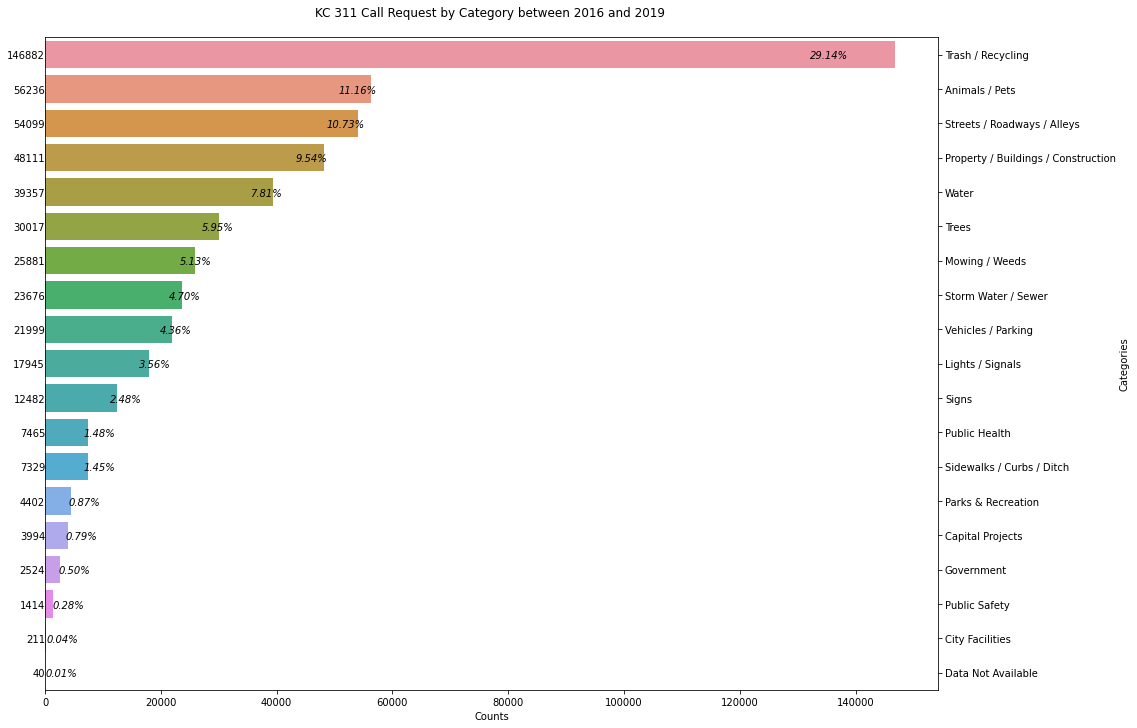

In [0]:
# KC 311 Call Request by Category

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 # Control plt figure size (valid for axis object)
plt.figure(figsize=(16,12))
# Plot the countplot
ax=sns.countplot(y='CATEGORY', dodge=True, data=df_kc_ts,
                 order = df_kc_ts['CATEGORY'].value_counts().index);

# Set x axis tick at bottom as counts
ax.xaxis.tick_bottom()
ax.yaxis.tick_right()

# Also switch the labels over
ax.xaxis.set_label_position('bottom')
ax.set_xlabel('Counts')
ax.yaxis.set_label_position('right')


# annotate the percentage of each column
total = (df_kc_ts).shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width()/total)
    coutns = '{:.0f}'.format(p.get_width())
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x*9/10, y), ha='left', va='center_baseline',style='italic')
    ax.annotate(coutns, (-0.1, y), ha='right', va='center_baseline')

# set title of the plot an x-axis label
ax.set_title(f"KC 311 Call Request by Category between 2016 and 2019 \n");
ax.set_ylabel('Categories');

#### 2019

In [0]:
df_kc_2019 = df_kc_ts.loc['2019-01-01':'2019-12-31']

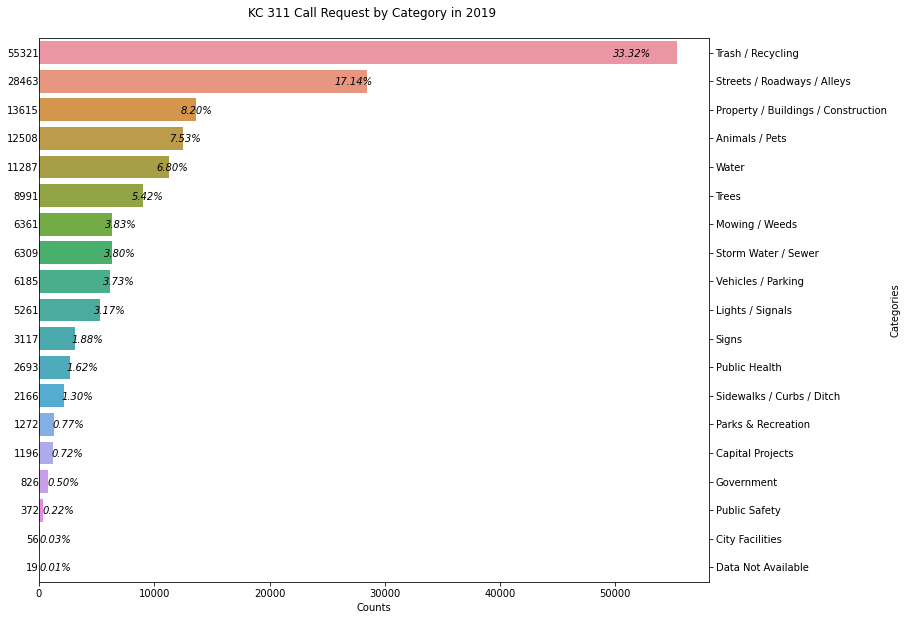

In [0]:
# KC 311 Call Request by Category

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

 # Control plt figure size (valid for axis object)
plt.figure(figsize=(12,10))

# Plot the countplot
ax=sns.countplot(y='CATEGORY', dodge=True, data=df_kc_2019,
                 order = df_kc_2019['CATEGORY'].value_counts().index);

# Set x axis tick at bottom as counts
ax.xaxis.tick_bottom()
ax.yaxis.tick_right()

# Also switch the labels over
ax.xaxis.set_label_position('bottom')
ax.set_xlabel('Counts')
ax.yaxis.set_label_position('right')

# annotate the percentage of each column
total = (df_kc_2019).shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width()/total)
    coutns = '{:.0f}'.format(p.get_width())
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x*9/10, y), ha='left', va='center_baseline',style='italic')
    ax.annotate(coutns, (-0.1, y), ha='right', va='center_baseline')

# set title of the plot an x-axis label
ax.set_title(f"KC 311 Call Request by Category in 2019 \n");
ax.set_ylabel('Categories');

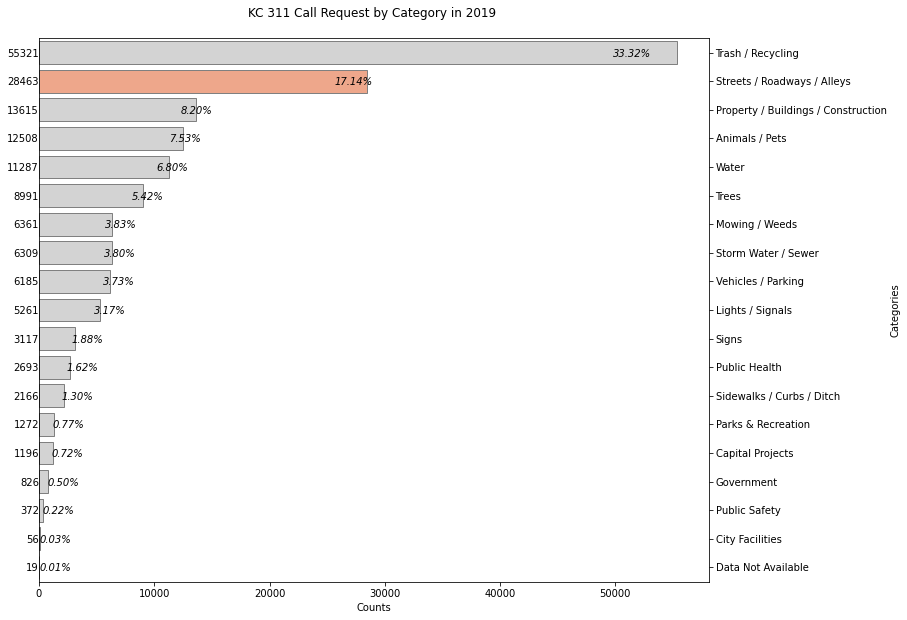

In [0]:
# 2019 Highlight!!
# KC 311 Call Request by Category

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Control plt figure size (valid for axis object)
plt.figure(figsize=(12,10))

# Control color of the bars for highlighting the specific bars
color_par = df_kc_2019['CATEGORY'].value_counts().values
    # https://htmlcolorcodes.com/color-names/
clrs = ['LIGHTSALMON' if (x == 28463) else 'LIGHTGRAY' for x in color_par] 

# Plot the countplot
ax=sns.countplot(y='CATEGORY', dodge=True, data=df_kc_2019, palette=clrs, edgecolor='grey',
                 order = df_kc_2019['CATEGORY'].value_counts().index);

# Set x axis tick at bottom as counts
ax.xaxis.tick_bottom()
ax.yaxis.tick_right()

# Also switch the labels over
ax.xaxis.set_label_position('bottom')
ax.set_xlabel('Counts')
ax.yaxis.set_label_position('right')


# annotate the percentage of each column
total = (df_kc_2019).shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width()/total)
    coutns = '{:.0f}'.format(p.get_width())
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x*9/10, y), ha='left', va='center_baseline',style='italic')
    ax.annotate(coutns, (-0.1, y), ha='right', va='center_baseline')

# set title of the plot an x-axis label
ax.set_title(f"KC 311 Call Request by Category in 2019 \n");
ax.set_ylabel('Categories');

#### 2018

In [0]:
df_kc_2018 = df_kc_ts.loc['2018-01-01':'2018-12-31']

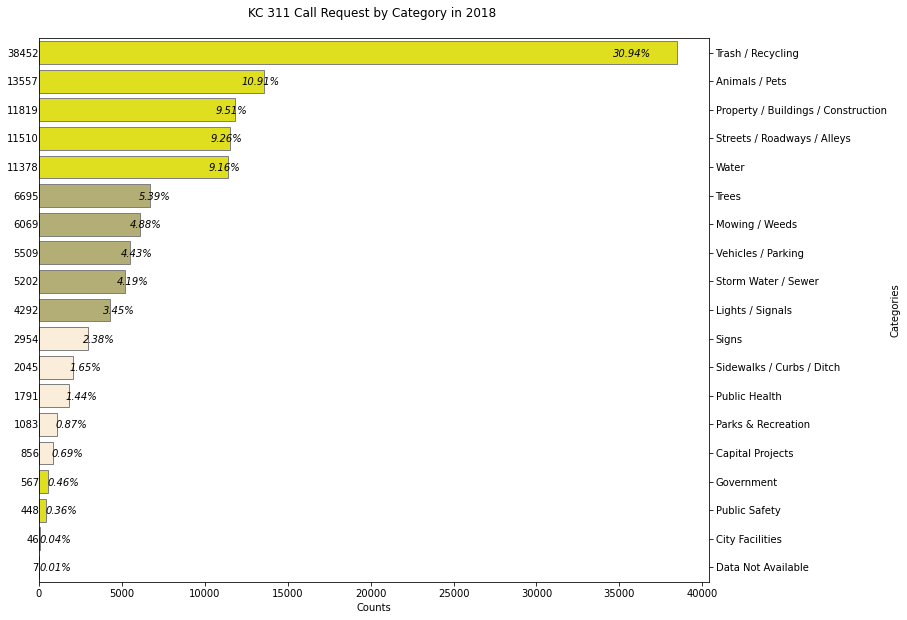

In [0]:
# KC 311 Call Request by Category

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Control plt figure size (valid for axis object)
plt.figure(figsize=(12,10))

# Control color of the bars for highlighting the specific bars
color_par = df_kc_2018['CATEGORY'].value_counts()[:15].values
    # https://htmlcolorcodes.com/color-names/
clrs = ['PAPAYAWHIP' if (x < 3600) else 'DARKKHAKI' if (3600 < x < 7000) else 'YELLOW' for x in color_par] 


# Plot the countplot
ax=sns.countplot(y='CATEGORY', dodge=True, data=df_kc_2018, palette=clrs, edgecolor='grey',
                 order = df_kc_2018['CATEGORY'].value_counts().index);

# Set x axis tick at bottom as counts
ax.xaxis.tick_bottom()
ax.yaxis.tick_right()

# Also switch the labels over
ax.xaxis.set_label_position('bottom')
ax.set_xlabel('Counts')
ax.yaxis.set_label_position('right')

# annotate the percentage of each column
total = (df_kc_2018).shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width()/total)
    coutns = '{:.0f}'.format(p.get_width())
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x*9/10, y), ha='left', va='center_baseline',style='italic')
    ax.annotate(coutns, (-0.1, y), ha='right', va='center_baseline')

# set title of the plot an x-axis label
ax.set_title(f"KC 311 Call Request by Category in 2018 \n");
ax.set_ylabel('Categories');

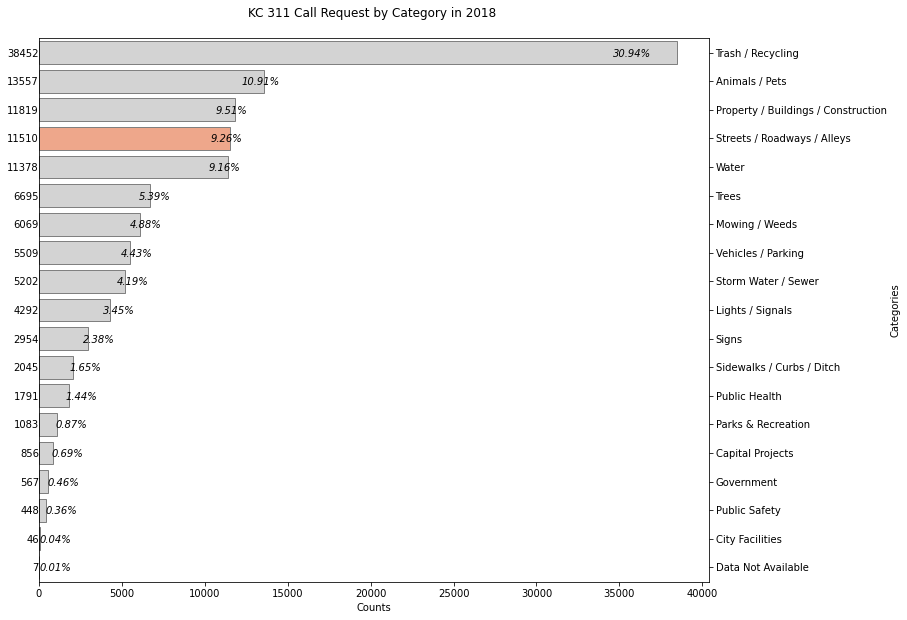

In [0]:
# 2018 Highlight!!
# KC 311 Call Request by Category

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

 # Control plt figure size (valid for axis object)
plt.figure(figsize=(12,10))

# Control color of the bars for highlighting the specific bars
color_par = df_kc_2018['CATEGORY'].value_counts().values
    # https://htmlcolorcodes.com/color-names/
clrs = ['LIGHTSALMON' if (x == 11510) else 'LIGHTGRAY' for x in color_par] 

# Plot the countplot
ax=sns.countplot(y='CATEGORY', dodge=True, data=df_kc_2018, palette=clrs, edgecolor='grey',
                 order = df_kc_2018['CATEGORY'].value_counts().index);

# Set x axis tick at bottom as counts
ax.xaxis.tick_bottom()
ax.yaxis.tick_right()

# Also switch the labels over
ax.xaxis.set_label_position('bottom')
ax.set_xlabel('Counts')
ax.yaxis.set_label_position('right')


# annotate the percentage of each column
total = (df_kc_2018).shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width()/total)
    coutns = '{:.0f}'.format(p.get_width())
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x*9/10, y), ha='left', va='center_baseline',style='italic')
    ax.annotate(coutns, (-0.1, y), ha='right', va='center_baseline')

# set title of the plot an x-axis label
ax.set_title(f"KC 311 Call Request by Category in 2018 \n");
ax.set_ylabel('Categories');

### Type distribution

#### 2019

In [0]:
df_kc_2019 = df_kc_ts.loc['2019-01-01':'2019-12-31']

In [0]:
df_kc_2019.columns

Index(['CASE ID', 'SOURCE', 'DEPARTMENT', 'WORK GROUP', 'REQUEST TYPE',
       'CATEGORY', 'TYPE', 'DETAIL', 'CREATION TIME', 'CREATION MONTH',
       'CREATION YEAR', 'STATUS', 'EXCEEDED EST TIMEFRAME', 'CLOSED DATE',
       'CLOSED MONTH', 'CLOSED YEAR', 'DAYS TO CLOSE', 'STREET ADDRESS',
       'ADDRESS WITH GEOCODE', 'ZIP CODE', 'NEIGHBORHOOD', 'COUNTY',
       'COUNCIL DISTRICT', 'POLICE DISTRICT', 'PARCEL ID NO', 'LATITUDE',
       'LONGITUDE', 'CASE URL', '30-60-90 Days Open Window'],
      dtype='object')

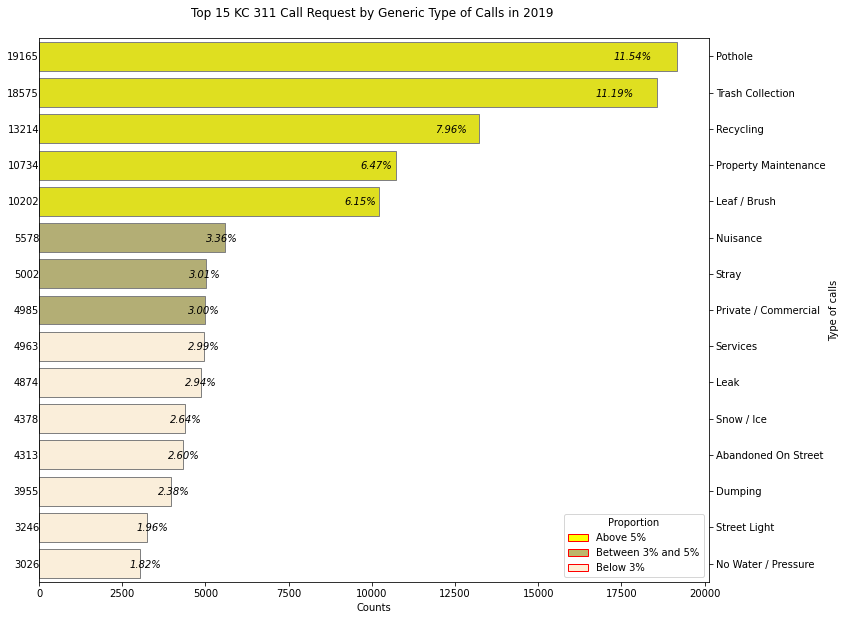

In [0]:
# KC 311 Call Request by Category

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Control plt figure size (valid for axis object)
plt.figure(figsize=(12,10))

# Control color of the bars for highlighting the specific bars
color_par = df_kc_2019['TYPE'].value_counts()[:15].values
    # https://htmlcolorcodes.com/color-names/
clrs = ['PAPAYAWHIP' if (x < 4970) else 'DARKKHAKI' if (4970 <= x < 7000) else 'YELLOW' for x in color_par] 

# Plot the countplot
ax=sns.countplot(y='TYPE', dodge=True, data=df_kc_2019, palette=clrs, edgecolor='grey',
                 order = df_kc_2019['TYPE'].value_counts()[:15].index);

# Set x axis tick at bottom as counts
ax.xaxis.tick_bottom()
ax.yaxis.tick_right()

# Also switch the labels over
ax.xaxis.set_label_position('bottom')
ax.set_xlabel('Counts')
ax.yaxis.set_label_position('right')

# Control legend
legend_elements = [Patch(facecolor='YELLOW', edgecolor='r',
                         label='Above 5%'),
                   Patch(facecolor='DARKKHAKI', edgecolor='r',
                         label='Between 3% and 5%'),
                   Patch(facecolor='PAPAYAWHIP', edgecolor='r',
                         label='Below 3%') ]
ax.legend(loc='lower right',fancybox=True, handles=legend_elements, title='Proportion')

# annotate the percentage of each column
total = (df_kc_2019).shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width()/total)
    coutns = '{:.0f}'.format(p.get_width())
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x*9/10, y), ha='left', va='center_baseline',style='italic')
    ax.annotate(coutns, (-0.1, y), ha='right', va='center_baseline')

# set title of the plot an x-axis label
ax.set_title(f"Top 15 KC 311 Call Request by Generic Type of Calls in 2019 \n");
ax.set_ylabel('Type of calls');

#### 2018

There were 129 types of calls

In [0]:
len(df_kc_2019['CATEGORY'].value_counts())

19

In [0]:
len(df_kc_2018['TYPE'].value_counts())

129

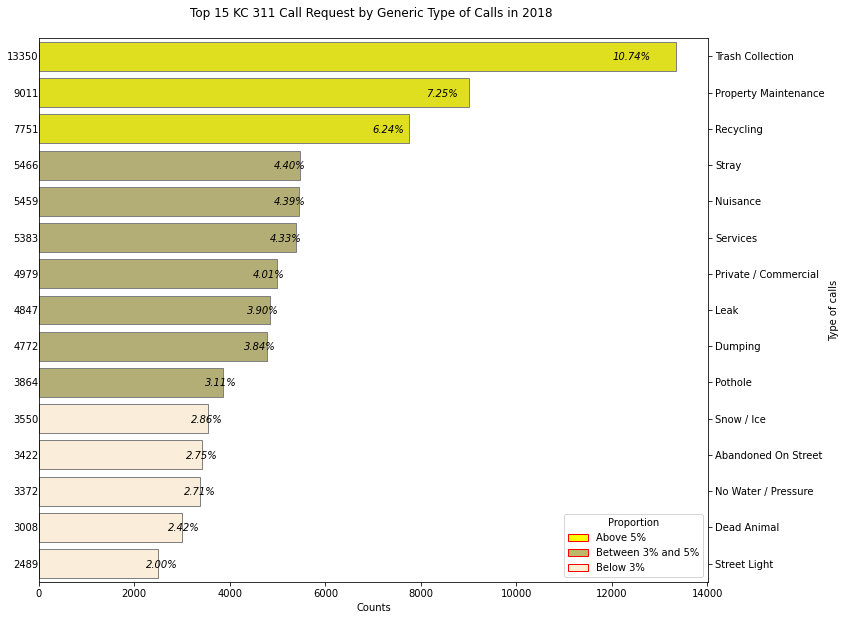

In [0]:
# KC 311 Call Request by Category

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Control plt figure size (valid for axis object)
plt.figure(figsize=(12,10))

# Control color of the bars for highlighting the specific bars
color_par = df_kc_2018['TYPE'].value_counts()[:15].values
    # https://htmlcolorcodes.com/color-names/
clrs = ['PAPAYAWHIP' if (x < 3600) else 'DARKKHAKI' if (3600 < x < 7000) else 'YELLOW' for x in color_par] 

# Plot the countplot
ax=sns.countplot(y='TYPE', dodge=True, data=df_kc_2018, palette=clrs, edgecolor='grey',
                 order = df_kc_2018['TYPE'].value_counts()[:15].index);

# Set x axis tick at bottom as counts
ax.xaxis.tick_bottom()
ax.yaxis.tick_right()

# Also switch the labels over
ax.xaxis.set_label_position('bottom')
ax.set_xlabel('Counts')
ax.yaxis.set_label_position('right')

# Control legend
legend_elements = [Patch(facecolor='YELLOW', edgecolor='r',
                         label='Above 5%'),
                   Patch(facecolor='DARKKHAKI', edgecolor='r',
                         label='Between 3% and 5%'),
                   Patch(facecolor='PAPAYAWHIP', edgecolor='r',
                         label='Below 3%') ]
ax.legend(loc='lower right',fancybox=True, handles=legend_elements, title='Proportion')

# annotate the percentage of each column
total = (df_kc_2018).shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width()/total)
    coutns = '{:.0f}'.format(p.get_width())
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x*9/10, y), ha='left', va='center_baseline',style='italic')
    ax.annotate(coutns, (-0.1, y), ha='right', va='center_baseline')

# set title of the plot an x-axis label
ax.set_title(f"Top 15 KC 311 Call Request by Generic Type of Calls in 2018 \n");
ax.set_ylabel('Type of calls');

### Work force breakdown


#### 2016-2019

In [0]:
df_kc_ts.pivot_table(values='CASE ID',index=['CATEGORY','TYPE','DEPARTMENT'],aggfunc='count').loc[(['Trash / Recycling',
                                                                                                      'Streets / Roadways / Alleys',
                                                                                                      'Property / Buildings / Construction',
                                                                                                      'Animals / Pets',
                                                                                                      'Water',
                                                                                                      'Trees'],slice(None)),:]

CASE ID
CATEGORY                            TYPE                                DEPARTMENT                            
Animals / Pets                      Bite                                NHS                               1075
                                    Cruelty or Neglect                  NHS                               6393
                                    Dead Animal                         City Managers Office                11
                                                                        NHS                              12269
                                    Permit / License                    NHS                                483
                                    Questionable Activity               NHS                               1313
                                    Rat Treatment                       City Managers Office                24
                                                                        Health                            6696
                                    Services                            City Managers Office                 1
                                                                        NHS                               1211
                                    Stray                               NHS                              22405
                                    Wildlife                            NHS                               4355
Property / Buildings / Construction Construction Issue/Concern          City Managers Office                36
                                                                        City Planning and Development     1919
                                                                        Public Works                         3
                                    Dangerous Building                  NHS                               7606
                                    Elevator Inspection                 City Planning and Development      108
                                                                        General Service                      7
                                                                        NHS                                  1
                                    Land Use / Zoning Issue             City Managers Office                 2
                                                                        City Planning and Development     1853
                                    Parking Lot                         City Planning and Development       54
                                    Property Maintenance                City Managers Office                34
                                                                        City Planning and Development        2
                                                                        Health                               1
                                                                        NHS                              31587
                                                                        Northland                         4272
                                                                        South                              242
                                    Services (CPD)                      City Managers Office                 2
                                                                        City Planning and Development      143
                                    Services (NPD)                      City Managers Office                 1
                                                                        NHS                                238
Streets / Roadways / Alleys         Broken Asphalt                      City Managers Office                 5
                                                                        Public Works                      1211
                                    Crack                               City Managers Office               

#### 2018-2019


In [0]:
df_kc_1819.pivot_table(values='CASE ID',index=['CATEGORY','TYPE','DEPARTMENT'],aggfunc='count').loc[(['Trash / Recycling',
                                                                                                      'Streets / Roadways / Alleys',
                                                                                                      'Property / Buildings / Construction',
                                                                                                      'Animals / Pets',
                                                                                                      'Water',
                                                                                                      'Trees'],slice(None)),:]

CASE ID
CATEGORY                            TYPE                                DEPARTMENT                            
Animals / Pets                      Bite                                NHS                                569
                                    Cruelty or Neglect                  NHS                               3152
                                    Dead Animal                         City Managers Office                 1
                                                                        NHS                               5968
                                    Permit / License                    NHS                                218
                                    Questionable Activity               NHS                                562
                                    Rat Treatment                       City Managers Office                 7
                                                                        Health                            2416
                                    Services                            NHS                                536
                                    Stray                               NHS                              10468
                                    Wildlife                            NHS                               2168
Property / Buildings / Construction Construction Issue/Concern          City Managers Office                18
                                                                        City Planning and Development      920
                                                                        Public Works                         2
                                    Dangerous Building                  NHS                               3528
                                    Elevator Inspection                 City Planning and Development       55
                                                                        General Service                      2
                                                                        NHS                                  1
                                    Land Use / Zoning Issue             City Managers Office                 2
                                                                        City Planning and Development      987
                                    Parking Lot                         City Planning and Development       29
                                    Property Maintenance                City Planning and Development        2
                                                                        Health                               1
                                                                        NHS                              15736
                                                                        Northland                         3764
                                                                        South                              242
                                    Services (CPD)                      City Managers Office                 1
                                                                        City Planning and Development       65
                                    Services (NPD)                      NHS                                 79
Streets / Roadways / Alleys         Broken Asphalt                      City Managers Office                 3
                                                                        Public Works                       562
                                    Crack                               City Managers Office                 1
                                                                        Public Works                       206
                                    Cut / Permit                        City Managers Office                21
                                                                        City Planning and Development      

#### 2019

In [0]:
df_kc_2019.pivot_table(values='CASE ID',index=['CATEGORY','TYPE','DEPARTMENT'],aggfunc='count').loc[(['Trash / Recycling',
                                                                                                      'Streets / Roadways / Alleys',
                                                                                                      'Property / Buildings / Construction',
                                                                                                      'Animals / Pets',
                                                                                                      'Water',
                                                                                                      'Trees'],slice(None)),:]

CASE ID
CATEGORY                            TYPE                                DEPARTMENT                            
Animals / Pets                      Bite                                NHS                                287
                                    Cruelty or Neglect                  NHS                               1558
                                    Dead Animal                         NHS                               2961
                                    Permit / License                    NHS                                103
                                    Questionable Activity               NHS                                280
                                    Rat Treatment                       City Managers Office                 1
                                                                        Health                            1035
                                    Services                            NHS                                278
                                    Stray                               NHS                               5002
                                    Wildlife                            NHS                               1003
Property / Buildings / Construction Construction Issue/Concern          City Managers Office                11
                                                                        City Planning and Development      492
                                                                        Public Works                         1
                                    Dangerous Building                  NHS                               1728
                                    Elevator Inspection                 City Planning and Development       30
                                                                        General Service                      1
                                                                        NHS                                  1
                                    Land Use / Zoning Issue             City Managers Office                 2
                                                                        City Planning and Development      521
                                    Parking Lot                         City Planning and Development       17
                                    Property Maintenance                City Planning and Development        1
                                                                        Health                               1
                                                                        NHS                               8062
                                                                        Northland                         2428
                                                                        South                              242
                                    Services (CPD)                      City Managers Office                 1
                                                                        City Planning and Development       44
                                    Services (NPD)                      NHS                                 32
Streets / Roadways / Alleys         Broken Asphalt                      City Managers Office                 1
                                                                        Public Works                       295
                                    Crack                               Public Works                        87
                                    Cut / Permit                        City Managers Office                 6
                                                                        City Planning and Development        2
                                                                        Parks and Rec                        4
                                                                        Public Works                       

#### 2018

In [0]:
df_kc_2018.pivot_table(values='CASE ID',index=['CATEGORY','TYPE','DEPARTMENT'],aggfunc='count').loc[(['Trash / Recycling',
                                                                                                      'Streets / Roadways / Alleys',
                                                                                                      'Property / Buildings / Construction',
                                                                                                      'Animals / Pets',
                                                                                                      'Water',
                                                                                                      'Trees'],slice(None)),:]

CASE ID
CATEGORY                            TYPE                                DEPARTMENT                            
Animals / Pets                      Bite                                NHS                                282
                                    Cruelty or Neglect                  NHS                               1594
                                    Dead Animal                         City Managers Office                 1
                                                                        NHS                               3007
                                    Permit / License                    NHS                                115
                                    Questionable Activity               NHS                                282
                                    Rat Treatment                       City Managers Office                 6
                                                                        Health                            1381
                                    Services                            NHS                                258
                                    Stray                               NHS                               5466
                                    Wildlife                            NHS                               1165
Property / Buildings / Construction Construction Issue/Concern          City Managers Office                 7
                                                                        City Planning and Development      428
                                                                        Public Works                         1
                                    Dangerous Building                  NHS                               1800
                                    Elevator Inspection                 City Planning and Development       25
                                                                        General Service                      1
                                    Land Use / Zoning Issue             City Planning and Development      466
                                    Parking Lot                         City Planning and Development       12
                                    Property Maintenance                City Planning and Development        1
                                                                        NHS                               7674
                                                                        Northland                         1336
                                    Services (CPD)                      City Planning and Development       21
                                    Services (NPD)                      NHS                                 47
Streets / Roadways / Alleys         Broken Asphalt                      City Managers Office                 2
                                                                        Public Works                       267
                                    Crack                               City Managers Office                 1
                                                                        Public Works                       119
                                    Cut / Permit                        City Managers Office                15
                                                                        Parks and Rec                        1
                                                                        Public Works                       733
                                                                        Water Services                       7
                                    Guardrail                           Public Works                        40
                                    Markings / Paint                    City Managers Office                 1
                                                                        Public Works                       

### Time Series Analysis

#### 18 Categories:

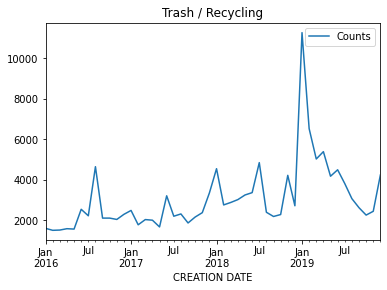

In [0]:
# Trash / Recycling
TrashRecycling_ts = df_kc_ts[df_kc_ts['CATEGORY']=='Trash / Recycling'][['CASE ID']].resample('M').count()
TrashRecycling_ts.rename(columns={'CASE ID':'Counts'}, inplace=True)
TrashRecycling_ts.plot()
plt.legend(labels=['Counts']);
plt.title('Trash / Recycling');

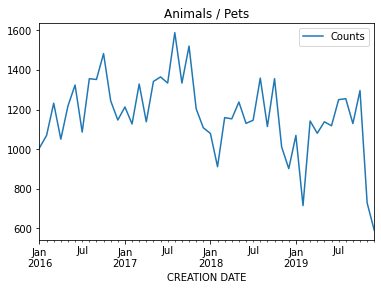

In [0]:
# Animals / Pets
AnimalsPets_ts = df_kc_ts[df_kc_ts['CATEGORY']=='Animals / Pets'][['CASE ID']].resample('M').count()
AnimalsPets_ts.rename(columns={'CASE ID':'Counts'}, inplace=True)
AnimalsPets_ts.plot()
plt.legend(labels=['Counts']);
plt.title('Animals / Pets');

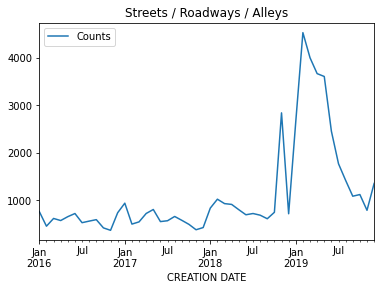

In [0]:
# Streets / Roadways / Alleys
StreetsRoadwaysAlleys_ts = df_kc_ts[df_kc_ts['CATEGORY']=='Streets / Roadways / Alleys'][['CASE ID']].resample('M').count()
StreetsRoadwaysAlleys_ts.rename(columns={'CASE ID':'Counts'}, inplace=True)
StreetsRoadwaysAlleys_ts.plot()
plt.legend(labels=['Counts']);
plt.title('Streets / Roadways / Alleys');

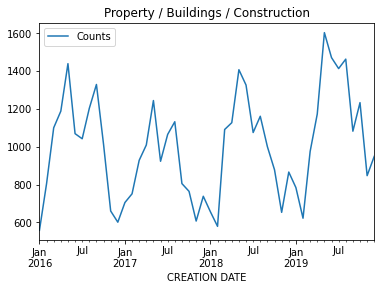

In [0]:
# Property / Buildings / Construction
PropertyBuildingsConstruction_ts = df_kc_ts[df_kc_ts['CATEGORY']=='Property / Buildings / Construction'][['CASE ID']].resample('M').count()
PropertyBuildingsConstruction_ts.rename(columns={'CASE ID':'Counts'}, inplace=True)
PropertyBuildingsConstruction_ts.plot()
plt.legend(labels=['Counts']);
plt.title('Property / Buildings / Construction');

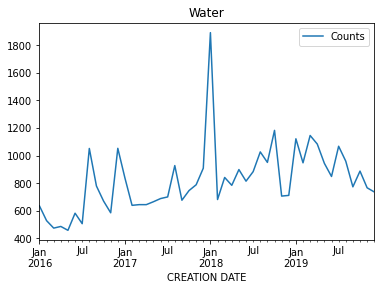

In [0]:
# Water
Water_ts = df_kc_ts[df_kc_ts['CATEGORY']=='Water'][['CASE ID']].resample('M').count()
Water_ts.rename(columns={'CASE ID':'Counts'}, inplace=True)
Water_ts.plot()
plt.legend(labels=['Counts']);
plt.title('Water');

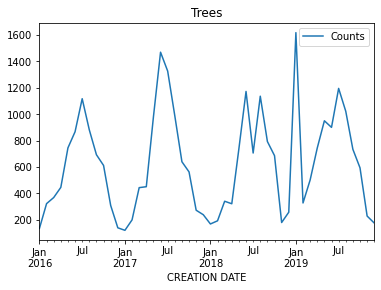

In [0]:
# Trees
Trees_ts = df_kc_ts[df_kc_ts['CATEGORY']=='Trees'][['CASE ID']].resample('M').count()
Trees_ts.rename(columns={'CASE ID':'Counts'}, inplace=True)
Trees_ts.plot()
plt.legend(labels=['Counts']);
plt.title('Trees');

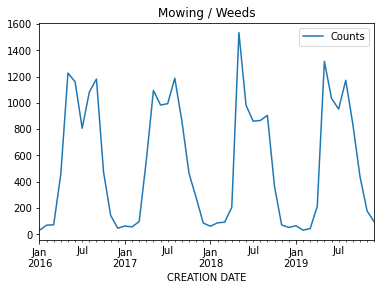

In [0]:
# Mowing / Weeds
MowingWeeds_ts = df_kc_ts[df_kc_ts['CATEGORY']=='Mowing / Weeds'][['CASE ID']].resample('M').count()
MowingWeeds_ts.rename(columns={'CASE ID':'Counts'}, inplace=True)
MowingWeeds_ts.plot()
plt.legend(labels=['Counts']);
plt.title('Mowing / Weeds');

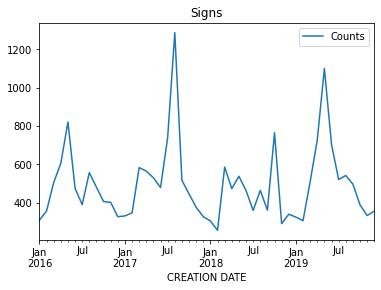

In [0]:
# Storm Water / Sewer
StormWaterSewer_ts = df_kc_ts[df_kc_ts['CATEGORY']=='Storm Water / Sewer'][['CASE ID']].resample('M').count()
StormWaterSewer_ts.rename(columns={'CASE ID':'Counts'}, inplace=True)
StormWaterSewer_ts.plot()
plt.legend(labels=['Counts']);
plt.title('Signs');

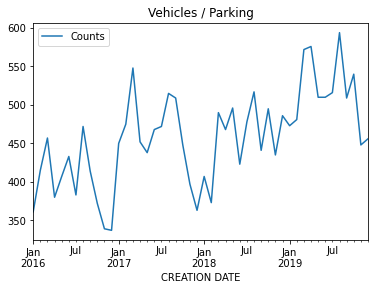

In [0]:
# Vehicles / Parking
VehiclesParking_ts = df_kc_ts[df_kc_ts['CATEGORY']=='Vehicles / Parking'][['CASE ID']].resample('M').count()
VehiclesParking_ts.rename(columns={'CASE ID':'Counts'}, inplace=True)
VehiclesParking_ts.plot()
plt.legend(labels=['Counts']);
plt.title('Vehicles / Parking');

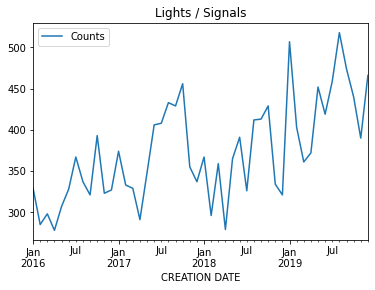

In [0]:
# Lights / Signals
LightsSignals_ts = df_kc_ts[df_kc_ts['CATEGORY']=='Lights / Signals'][['CASE ID']].resample('M').count()
LightsSignals_ts.rename(columns={'CASE ID':'Counts'}, inplace=True)
LightsSignals_ts.plot()
plt.legend(labels=['Counts']);
plt.title('Lights / Signals');

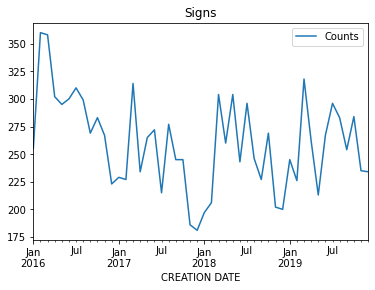

In [0]:
# Signs
Signs_ts = df_kc_ts[df_kc_ts['CATEGORY']=='Signs'][['CASE ID']].resample('M').count()
Signs_ts.rename(columns={'CASE ID':'Counts'}, inplace=True)
Signs_ts.plot()
plt.legend(labels=['Counts']);
plt.title('Signs');

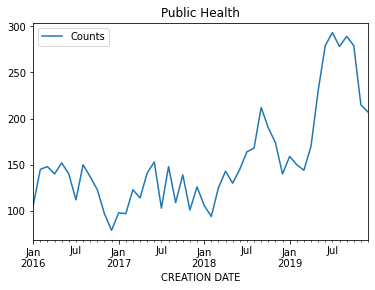

In [0]:
# Public Health
PublicHealth_ts = df_kc_ts[df_kc_ts['CATEGORY']=='Public Health'][['CASE ID']].resample('M').count()
PublicHealth_ts.rename(columns={'CASE ID':'Counts'}, inplace=True)
PublicHealth_ts.plot()
plt.legend(labels=['Counts']);
plt.title('Public Health');

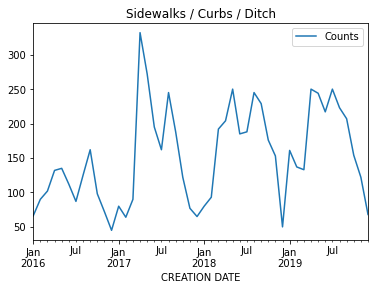

In [0]:
# Sidewalks / Curbs / Ditch
SidewalksCurbsDitch_ts = df_kc_ts[df_kc_ts['CATEGORY']=='Sidewalks / Curbs / Ditch'][['CASE ID']].resample('M').count()
SidewalksCurbsDitch_ts.rename(columns={'CASE ID':'Counts'}, inplace=True)
SidewalksCurbsDitch_ts.plot()
plt.legend(labels=['Counts']);
plt.title('Sidewalks / Curbs / Ditch');

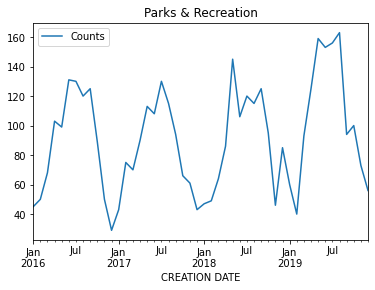

In [0]:
# Parks & Recreation
ParksRecreation_ts = df_kc_ts[df_kc_ts['CATEGORY']=='Parks & Recreation'][['CASE ID']].resample('M').count()
ParksRecreation_ts.rename(columns={'CASE ID':'Counts'}, inplace=True)
ParksRecreation_ts.plot()
plt.legend(labels=['Counts']);
plt.title('Parks & Recreation');

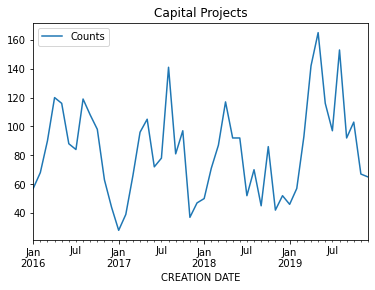

In [0]:
# Capital Projects
CapitalProjects_ts = df_kc_ts[df_kc_ts['CATEGORY']=='Capital Projects'][['CASE ID']].resample('M').count()
CapitalProjects_ts.rename(columns={'CASE ID':'Counts'}, inplace=True)
CapitalProjects_ts.plot()
plt.legend(labels=['Counts']);
plt.title('Capital Projects');

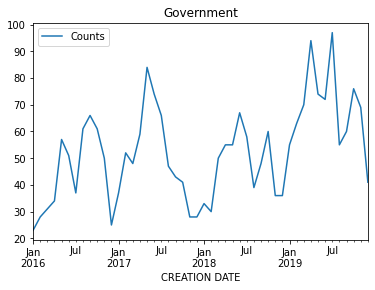

In [0]:
# Government
Government_ts = df_kc_ts[df_kc_ts['CATEGORY']=='Government'][['CASE ID']].resample('M').count()
Government_ts.rename(columns={'CASE ID':'Counts'}, inplace=True)
Government_ts.plot()
plt.legend(labels=['Counts']);
plt.title('Government');

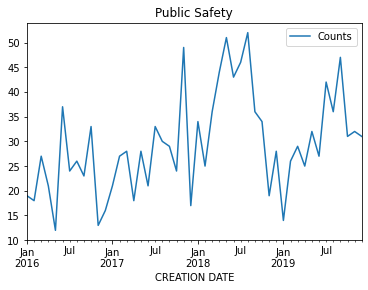

In [0]:
# Public Safety
PublicSafety_ts = df_kc_ts[df_kc_ts['CATEGORY']=='Public Safety'][['CASE ID']].resample('M').count()
PublicSafety_ts.rename(columns={'CASE ID':'Counts'}, inplace=True)
PublicSafety_ts.plot()
plt.legend(labels=['Counts']);
plt.title('Public Safety');

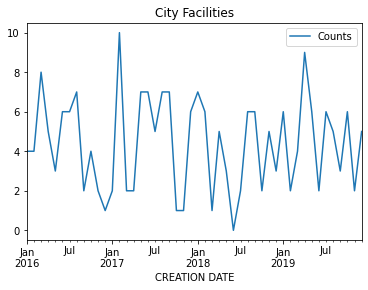

In [0]:
# City Facilities
CityFacilities_ts = df_kc_ts[df_kc_ts['CATEGORY']=='City Facilities'][['CASE ID']].resample('M').count()
CityFacilities_ts.rename(columns={'CASE ID':'Counts'}, inplace=True)
CityFacilities_ts.plot()
plt.legend(labels=['Counts']);
plt.title('City Facilities');

#### ARIMA

##### Define an automation test function:

In [0]:
# Automation of Testing
def adf_test(timeseries_df):
    '''
    Expect: a time series dataframe with single column
    Modifies: no modification on the this functions
    Returns: 1. Plots: time series plot, histogram of time series, boxplot of time series, Probability plot of time series
             2. Statistics: mean and median
             3. Augmented Dickey-Fuller unit root test result    
    '''

    from statsmodels.tsa.stattools import adfuller
    import scipy.stats
    import pylab
    import pandas as pd
    import matplotlib.pyplot as plt

    # Plotting
    timeseries_df.plot(title='Time Series Plot', figsize=(8,5));
    plt.legend(labels=['Counts'])
    plt.show()
    timeseries_df.hist(figsize=(8,5));
    plt.title('Histogram')
    plt.show()
    timeseries_df.boxplot(flierprops= {'marker':'D', 'markerfacecolor':'g'}, figsize=(8,5), vert=False); 
    plt.title('Box Plot')
    plt.show()
    scipy.stats.probplot(timeseries_df.squeeze(), plot=pylab); #squeeze to get rid of 1 dimension
    plt.title("QQ Plot", size = 12)
    pylab.show()
        # ACF plot
    plot_acf(timeseries_df);
    plt.title('ACF for General Price (MA)', size =15)
    plt.show()
        # PACF plot
    plot_pacf(timeseries_df, method='ols');
    plt.title('PACF for General Price (AR)', size=15)
    plt.show()

    # Statistics
    print('Central of tendency:')
    print('{:10}: {}'.format('Mean', timeseries_df.mean()[0]))
    print('{:10}: {}'.format('Median', timeseries_df.median()[0]))
    
    # Augmented Dickey-Fuller unit root test
    adf_test = adfuller(pd.Series(timeseries_df.squeeze())) #squeeze to get rid of 1 dimension
    print('\nADF Statistic: {:.6f}'.format(adf_test[0]) )
    print('p-value: {:.6f}'.format(adf_test[1]))
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t{:>3s}: {:.3f}'.format(key, value))   

    if adf_test[1] <= 0.05:
        print("\n** Reject the null hypothesis. Data has no unit root and is stationary **")
    else:
        print("\n** Fail to reject the null hypothesis. Data has unit root and is non-stationary **")

In [0]:
# Build a Automation of SARIMAX validation for the following models
def SARIMAX_validation(AR, I, MA, sAR, sI, sMA, training_set, Season=12, start_date='2019-01-31'):
    '''
    Expect: p(AR),d(I),q(MA),P(sAR),D(sI),Q(sMA), training_set, start_date(validation)
    Modifies: N/A
    Returns: 1. SARIMAX model Summary            
             2. Dynamic Forecast Plot
             3. Residual Plot RMSE
             4. RMSE
    '''

    import statsmodels.api as sm
    import numpy as np
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    import pandas as pd
    import matplotlib.pyplot as plt

    arima_order = (AR,I,MA)
    sarimax_order = (sAR,sI,sMA, Season)
    print('SARIMAX{}X{}\n'.format(arima_order,sarimax_order))

    # SARIMAX model
    mod = sm.tsa.statespace.SARIMAX(training_set,  
                                        order=arima_order,
                                        seasonal_order=sarimax_order,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
    results = mod.fit()
    pred_dynamic = results.get_prediction(start=pd.to_datetime(start_date),
                                        dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()

    # Summary
    print(results.summary())

    # Plotting
    # subset the data from 2016
    ax = training_set['2016':].plot(label='observed', figsize=(12, 10))
    pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

    ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(start_date), training_set.index[-1],
                    alpha=.1, zorder=-1)
    ax.set_xlabel('Date')
    ax.set_ylabel('Call counts')
    plt.legend()
    plt.show()

    # Residual 
    results.plot_diagnostics(figsize=(15, 12))
    plt.show()

    # RMSE
    y_forecasted = pred_dynamic.predicted_mean.values
    y_truth = training_set[start_date:].values
    # Compute the mean square error
    mse = ((y_truth - y_forecasted) ** 2).mean()
    # Compute the RMSE
    rmse = sqrt(mse)
    print('{}: {}'.format('RMSE of forecasts is', round(rmse,4)))


In [0]:
# define a function to run auto arima and search for best model parameters
def find_orders(ts, exog=None):
    from pmdarima.arima import auto_arima
    stepwise_model = auto_arima(ts, start_p=1, start_q=1, max_p=4, max_q=14,
                                exogenous=exog, 
                                m=12, seasonal=True, stationary=False,
                                stepwise=True, trend='ct',
                                suppress_warnings=True, trace=False, 
                                error_action='ignore')

    return stepwise_model.order, stepwise_model.seasonal_order

In [0]:
# Build a Automation of SARIMAX forecast for the following models
def SARIMAX_forecast(AR, I, MA, sAR, sI, sMA, training_set, Season=12):
    '''
    Expect: p(AR),d(I),q(MA),P(sAR),D(sI),Q(sMA), training_set
    Modifies: N/A
    Returns: Forecast plot
    '''

    import statsmodels.api as sm
    import numpy as np
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    import pandas as pd
    import matplotlib.pyplot as plt

    arima_order = (AR,I,MA)
    sarimax_order = (sAR,sI,sMA, Season)
    print('SARIMAX{}X{}\n'.format(arima_order,sarimax_order))

    # SARIMAX model
    mod = sm.tsa.statespace.SARIMAX(training_set,  
                                        order=arima_order,
                                        seasonal_order=sarimax_order,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
    results = mod.fit()

    # Get forecast 100 steps ahead in future
    pred_uc = results.get_forecast(steps=30)

    # Get confidence intervals of forecasts
    pred_ci = pred_uc.conf_int()

    # Plotting
    ax = training_set.plot(label='observed', figsize=(12, 10))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('Call counts')
    plt.legend()
    plt.show()

##### Grid Search

In [0]:
# Build parameters for grid search
import itertools
p_values=range(0,3)
d_values=range(0,2)
q_values=range(0,3)
pdq=list(itertools.product(p_values,d_values,q_values))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p_values, d_values, q_values))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)


In [0]:
%%script false 
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(TrashRecycling_ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

##### Trash / Recycle


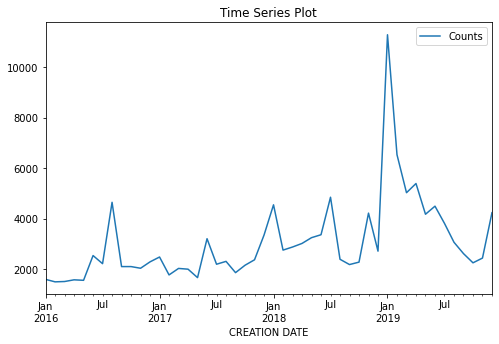

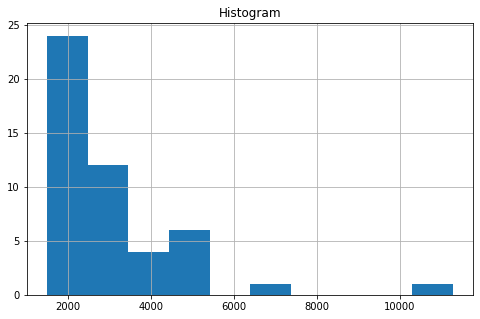

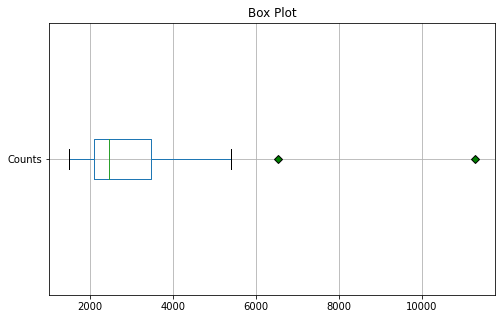

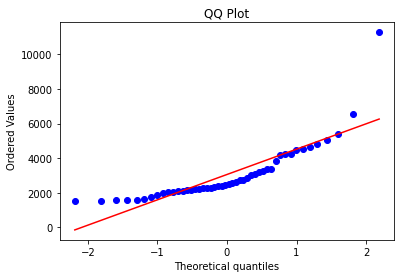

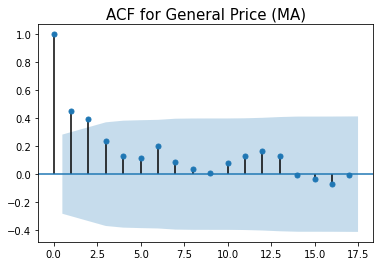

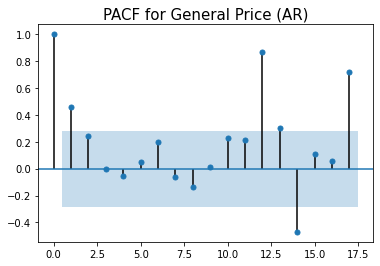

Central of tendency:
Mean      : 3060.0416666666665
Median    : 2462.0

ADF Statistic: -4.115373
p-value: 0.000913
Critical Values:
	 1%: -3.578
	 5%: -2.925
	10%: -2.601

** Reject the null hypothesis. Data has no unit root and is stationary **


In [0]:
adf_test(TrashRecycling_ts)

In [0]:
find_orders(TrashRecycling_ts)

((0, 0, 0), (0, 1, 0, 12))

SARIMAX(0, 0, 0)X(0, 1, 0, 12)

                            Statespace Model Results                            
Dep. Variable:                   Counts   No. Observations:                   48
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -311.043
Date:                  Thu, 19 Mar 2020   AIC                            624.086
Time:                          13:00:26   BIC                            625.642
Sample:                      01-31-2016   HQIC                           624.623
                           - 12-31-2019                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.996e+06    3.9e+05      7.677      0.000    2.23e+06    3.76e+06
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                40.28

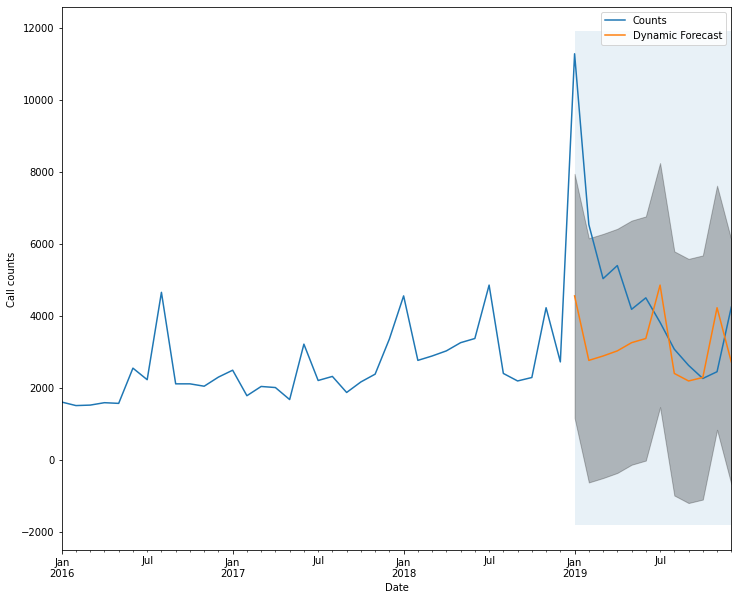

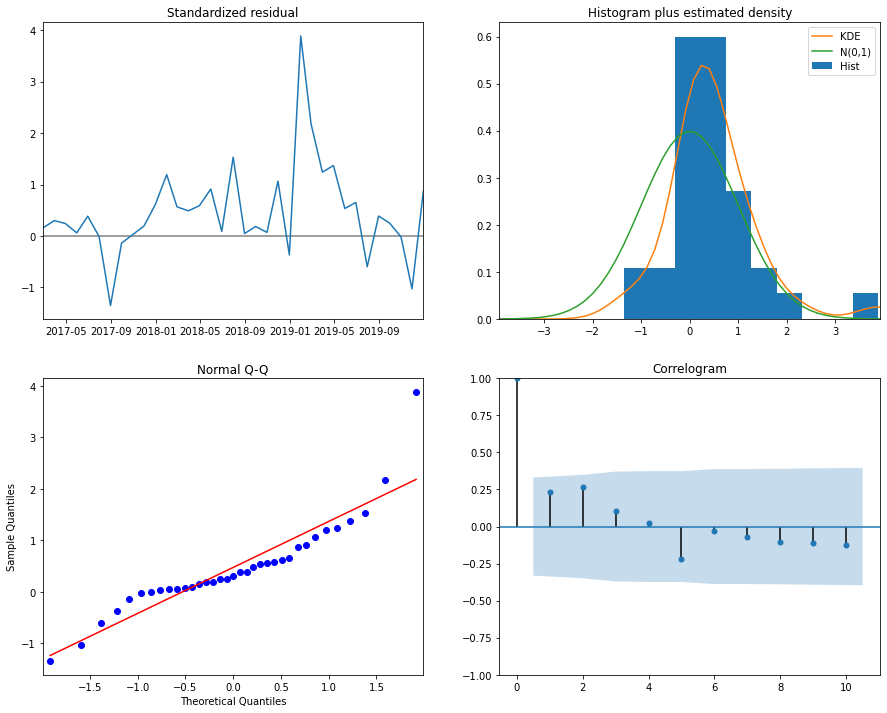

RMSE of forecasts is: 2871.1522


In [0]:
SARIMAX_validation(0,0,0,0,1,0,TrashRecycling_ts)

SARIMAX(0, 0, 0)X(0, 1, 0, 12)



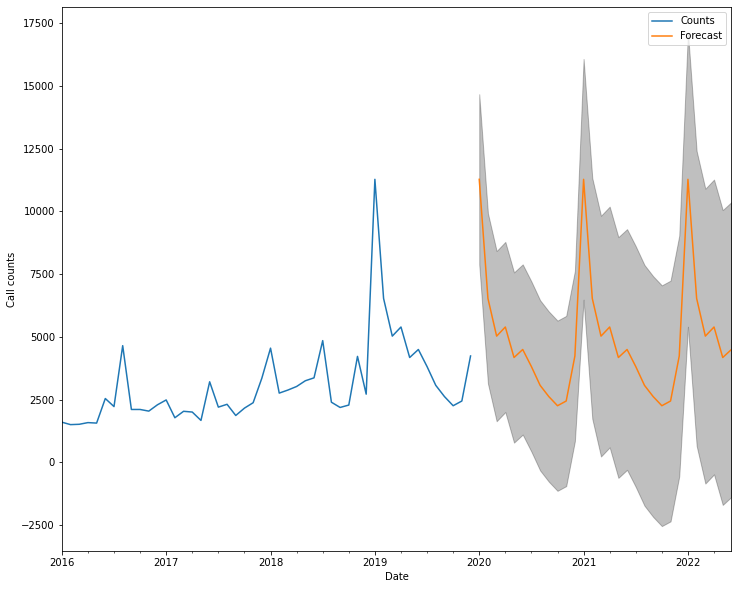

In [0]:
SARIMAX_forecast(0,0,0,0,1,0,TrashRecycling_ts)

##### # Animals / Pets

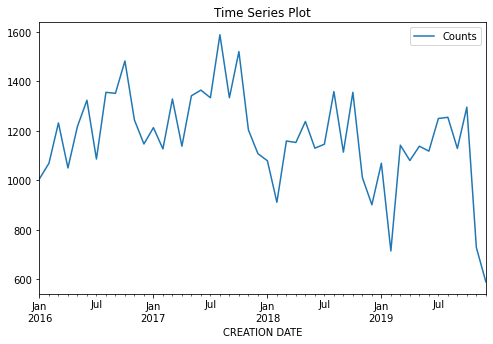

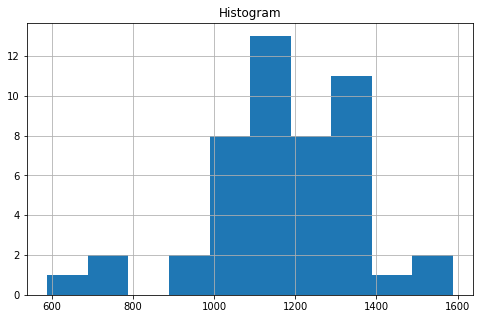

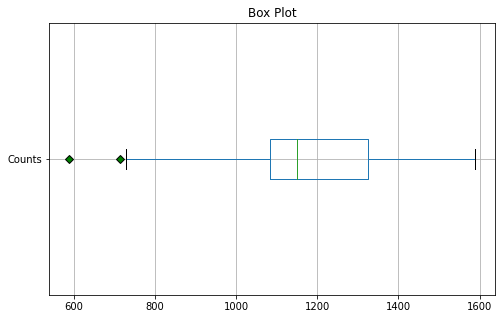

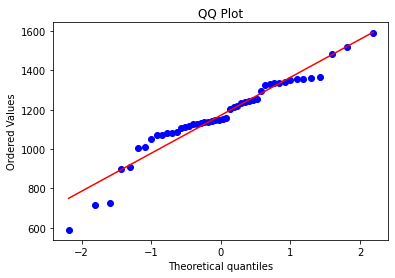

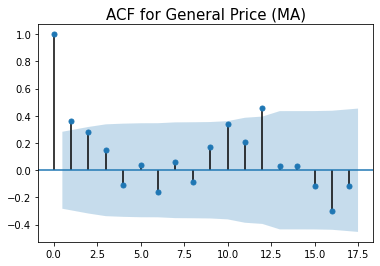

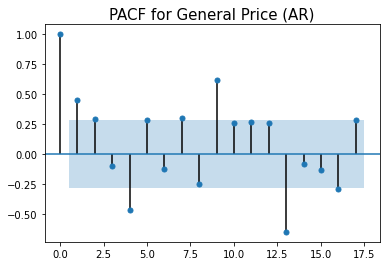

Central of tendency:
Mean      : 1171.5833333333333
Median    : 1150.0

ADF Statistic: 0.029051
p-value: 0.960870
Critical Values:
	 1%: -3.610
	 5%: -2.939
	10%: -2.608

** Fail to reject the null hypothesis. Data has unit root and is non-stationary **


In [0]:
adf_test(AnimalsPets_ts)

In [0]:
find_orders(AnimalsPets_ts)

((1, 1, 1), (0, 1, 0, 12))

SARIMAX(1, 1, 1)X(0, 1, 0, 12)

                                 Statespace Model Results                                 
Dep. Variable:                             Counts   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(0, 1, 0, 12)   Log Likelihood                -201.727
Date:                            Thu, 19 Mar 2020   AIC                            409.455
Time:                                    13:00:32   BIC                            413.944
Sample:                                01-31-2016   HQIC                           410.965
                                     - 12-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0343      0.527      0.065      0.948      -0.998       1.067
ma.

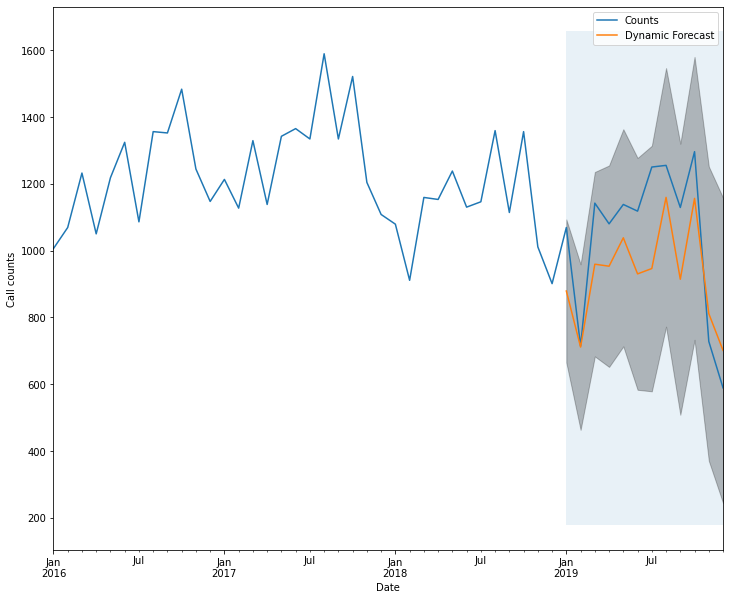

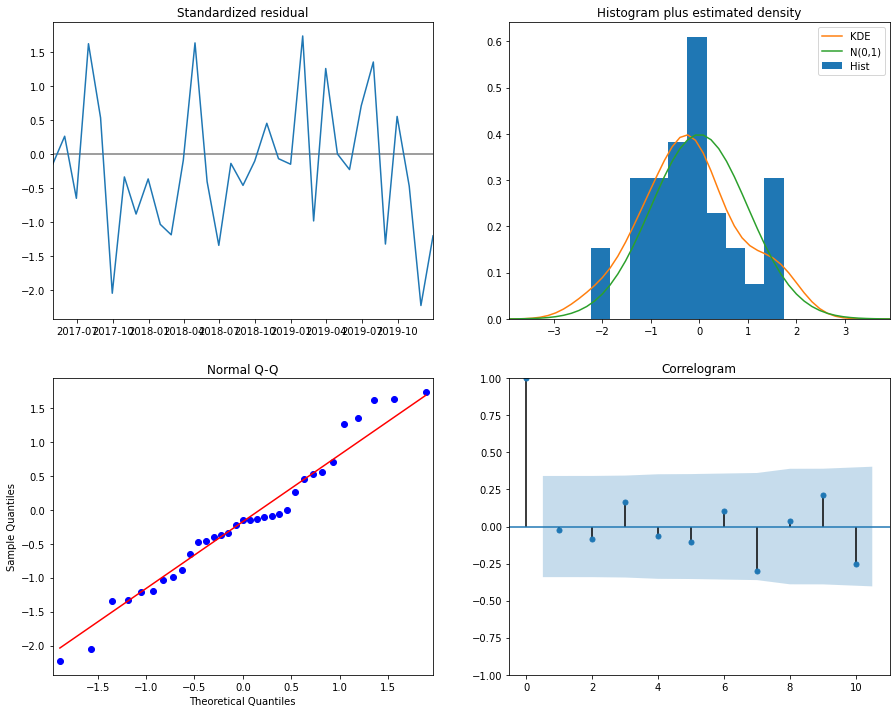

RMSE of forecasts is: 286.521


In [0]:
SARIMAX_validation(1,1,1,0,1,0,AnimalsPets_ts)

SARIMAX(0, 0, 0)X(0, 1, 0, 12)



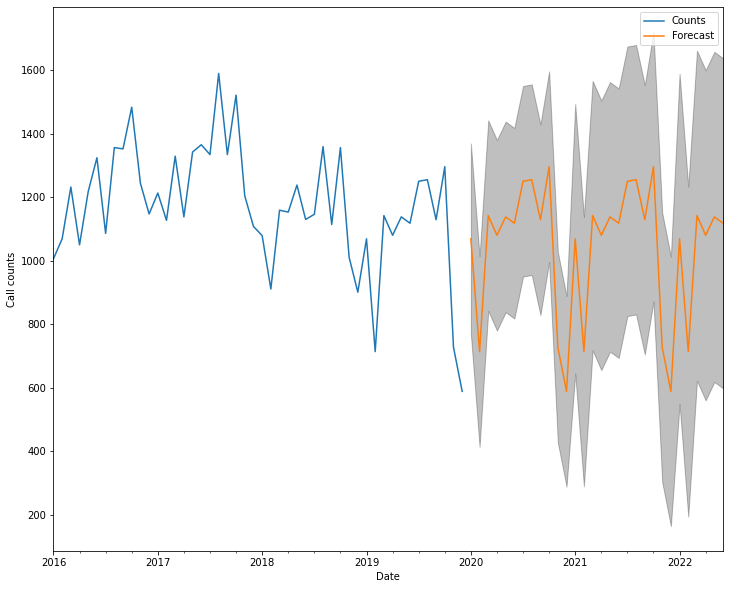

In [0]:
SARIMAX_forecast(0,0,0,0,1,0,AnimalsPets_ts)

#### Streets / Roadways / Alleys

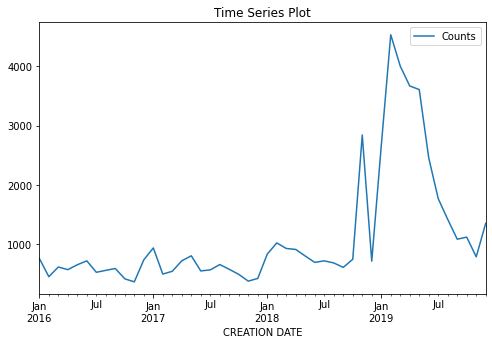

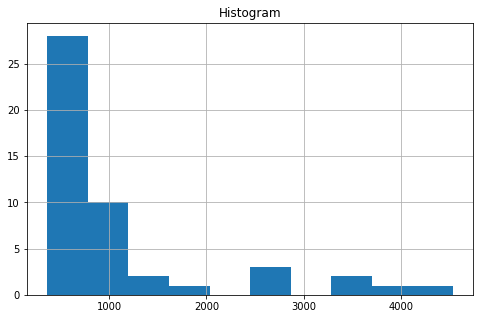

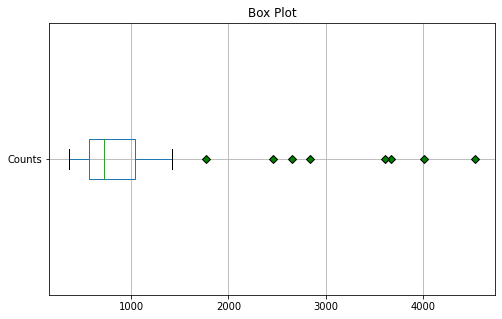

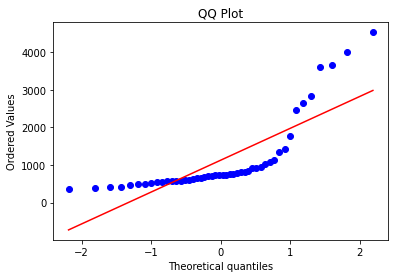

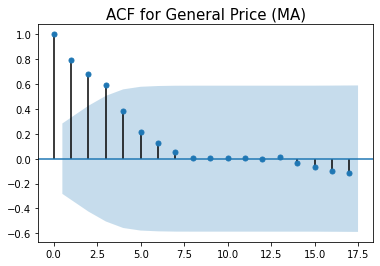

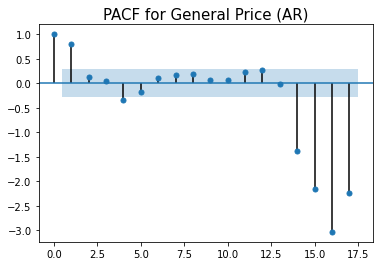

Central of tendency:
Mean      : 1127.0625
Median    : 720.5

ADF Statistic: -2.274976
p-value: 0.180166
Critical Values:
	 1%: -3.578
	 5%: -2.925
	10%: -2.601

** Fail to reject the null hypothesis. Data has unit root and is non-stationary **


In [0]:
adf_test(StreetsRoadwaysAlleys_ts)

In [0]:
find_orders(StreetsRoadwaysAlleys_ts)

((0, 1, 1), (0, 0, 0, 12))

SARIMAX(0, 1, 1)X(0, 0, 0, 12)

                           Statespace Model Results                           
Dep. Variable:                 Counts   No. Observations:                   48
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -355.180
Date:                Thu, 19 Mar 2020   AIC                            714.361
Time:                        13:00:39   BIC                            717.974
Sample:                    01-31-2016   HQIC                           715.708
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2276      0.086     -2.636      0.008      -0.397      -0.058
sigma2      4.426e+05   5.36e+04      8.253      0.000    3.37e+05    5.48e+05
Ljung-Box (Q):      

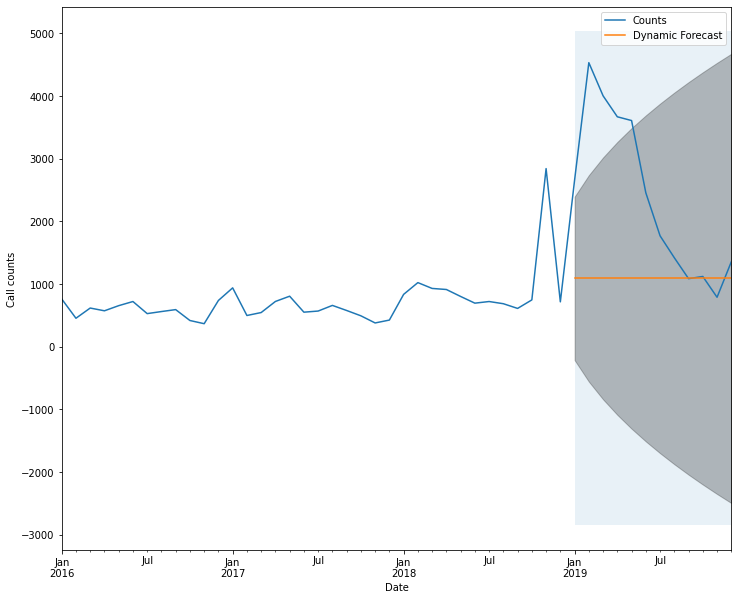

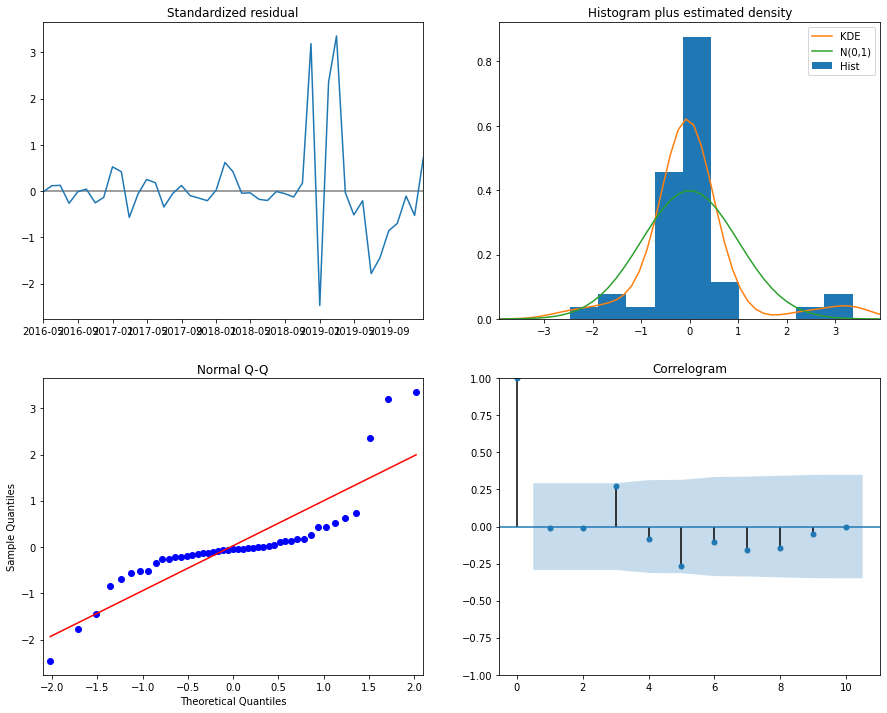

RMSE of forecasts is: 1789.3268


In [0]:
SARIMAX_validation(0,1,1,0,0,0,StreetsRoadwaysAlleys_ts)

SARIMAX(0, 1, 1)X(0, 0, 0, 12)



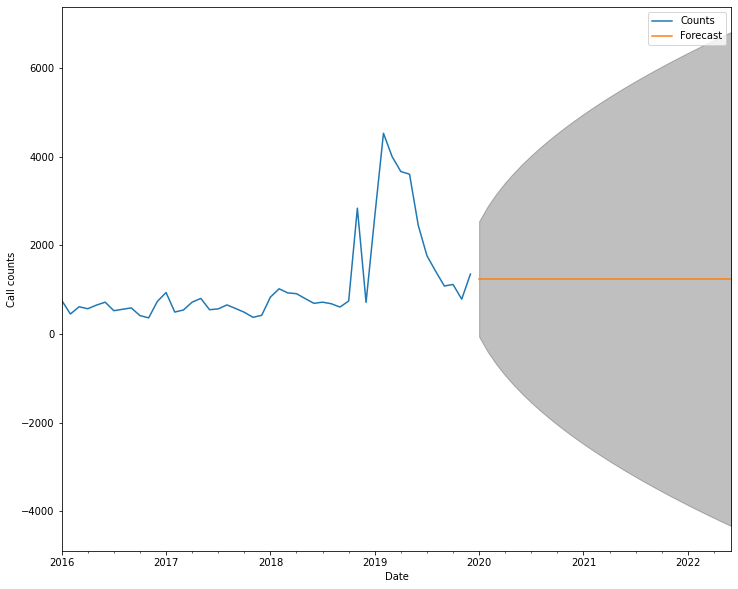

In [0]:
SARIMAX_forecast(0,1,1,0,0,0,StreetsRoadwaysAlleys_ts)

#### Property / Buildings / Construction

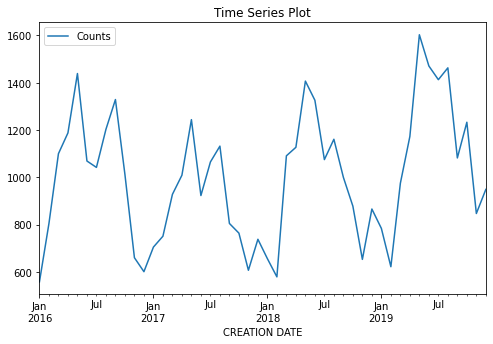

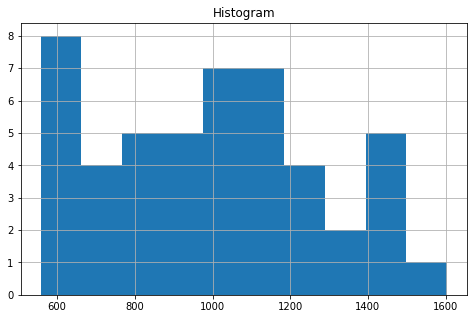

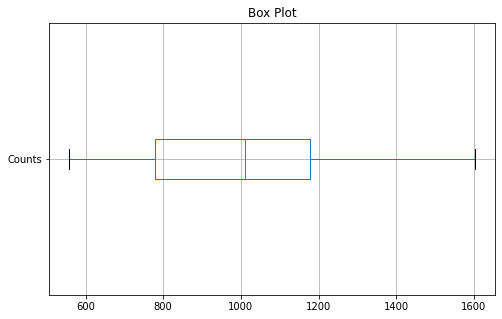

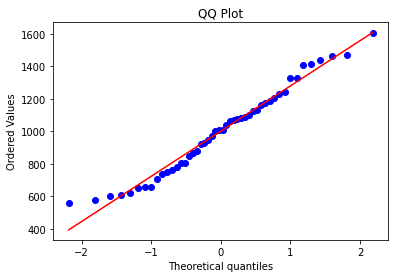

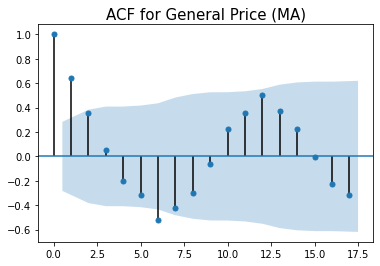

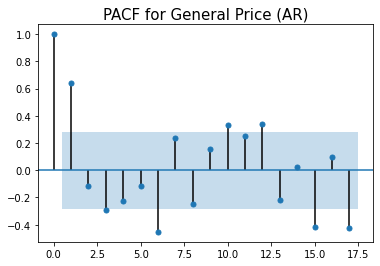

Central of tendency:
Mean      : 1002.3125
Median    : 1010.5

ADF Statistic: -2.745274
p-value: 0.066526
Critical Values:
	 1%: -3.601
	 5%: -2.935
	10%: -2.606

** Fail to reject the null hypothesis. Data has unit root and is non-stationary **


In [0]:
adf_test(PropertyBuildingsConstruction_ts)

In [0]:
find_orders(PropertyBuildingsConstruction_ts)

((1, 0, 0), (1, 0, 0, 12))

SARIMAX(1, 1, 0)X(1, 0, 0, 12)

                                 Statespace Model Results                                 
Dep. Variable:                             Counts   No. Observations:                   48
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -221.367
Date:                            Thu, 19 Mar 2020   AIC                            448.733
Time:                                    13:00:49   BIC                            453.312
Sample:                                01-31-2016   HQIC                           450.295
                                     - 12-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2569      0.217     -1.181      0.238      -0.683       0.169
ar.

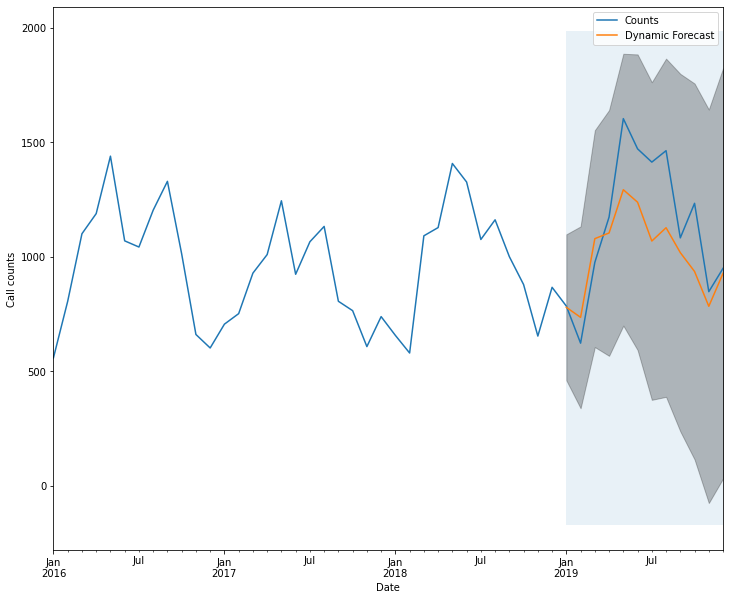

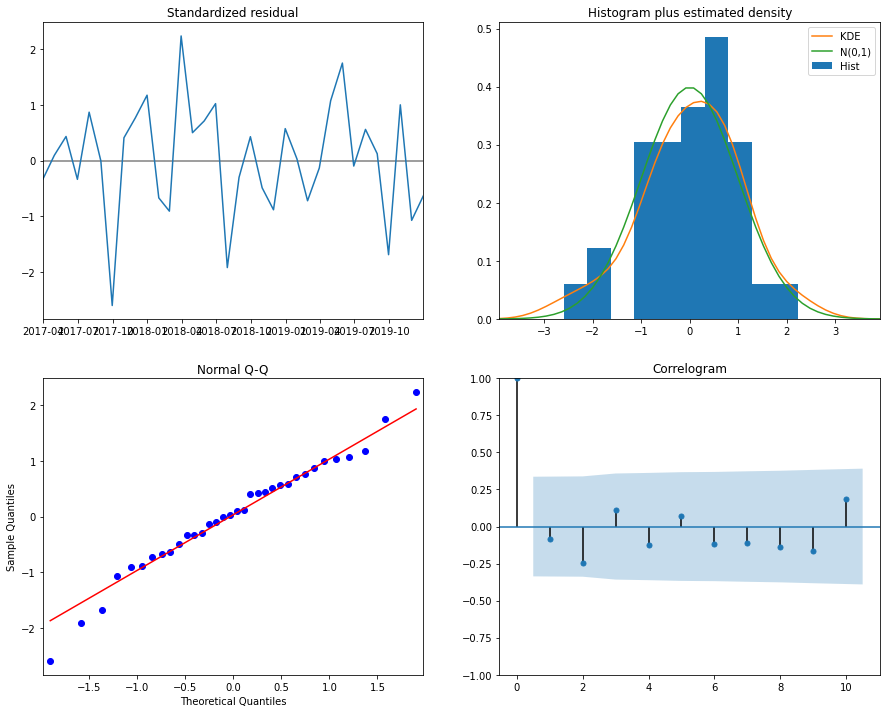

RMSE of forecasts is: 366.3896


In [0]:
SARIMAX_validation(1,1,0,1,0,0,PropertyBuildingsConstruction_ts)

SARIMAX(1, 1, 0)X(1, 0, 0, 12)



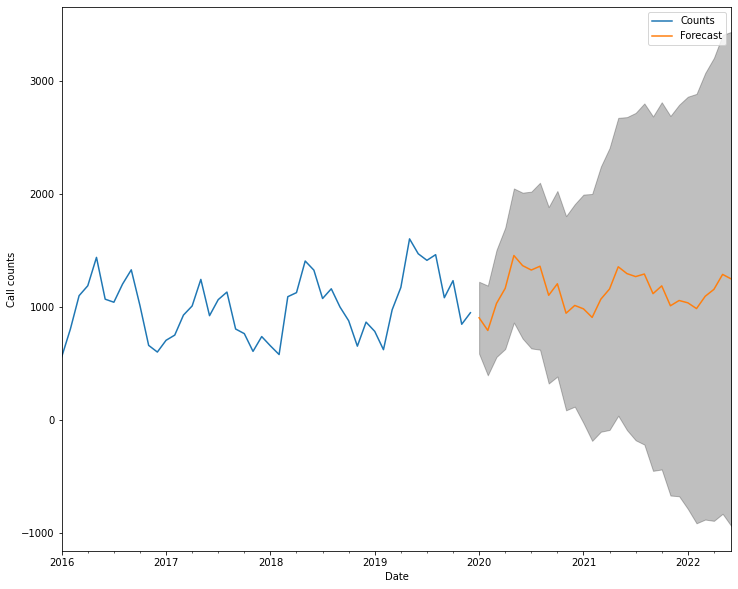

In [0]:
SARIMAX_forecast(1,1,0,1,0,0,PropertyBuildingsConstruction_ts)

#### Water

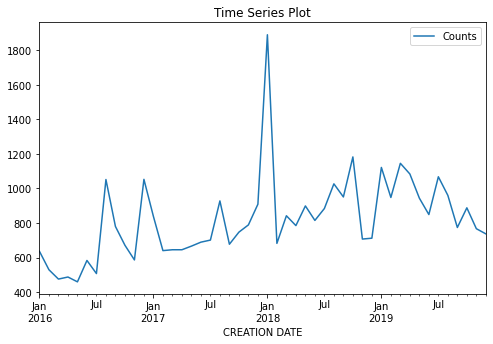

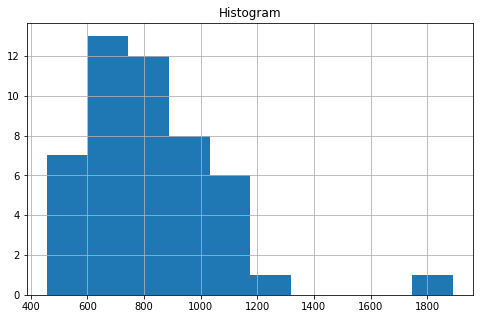

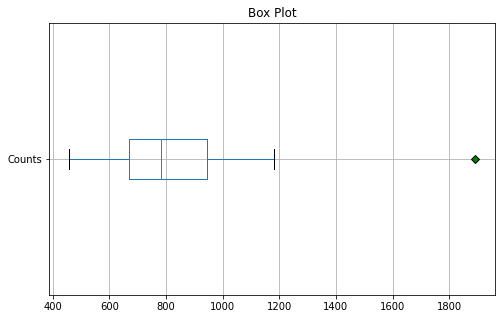

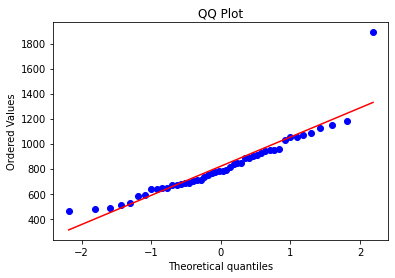

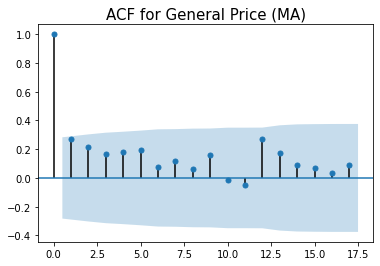

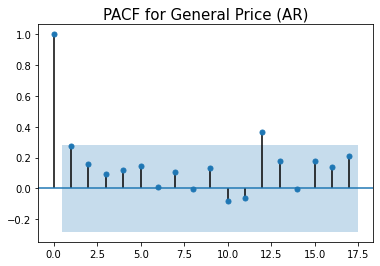

Central of tendency:
Mean      : 819.9375
Median    : 782.5

ADF Statistic: -5.099187
p-value: 0.000014
Critical Values:
	 1%: -3.578
	 5%: -2.925
	10%: -2.601

** Reject the null hypothesis. Data has no unit root and is stationary **


In [0]:
adf_test(Water_ts)

In [0]:
find_orders(Water_ts)

((0, 1, 1), (0, 0, 1, 12))

SARIMAX(1, 0, 1)X(0, 0, 0, 12)

                           Statespace Model Results                           
Dep. Variable:                 Counts   No. Observations:                   48
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -316.137
Date:                Thu, 19 Mar 2020   AIC                            638.274
Time:                        13:01:03   BIC                            643.760
Sample:                    01-31-2016   HQIC                           640.330
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0073      0.012     82.600      0.000       0.983       1.031
ma.L1         -0.8790      0.167     -5.272      0.000      -1.206      -0.552
sigma2      6.491e+0

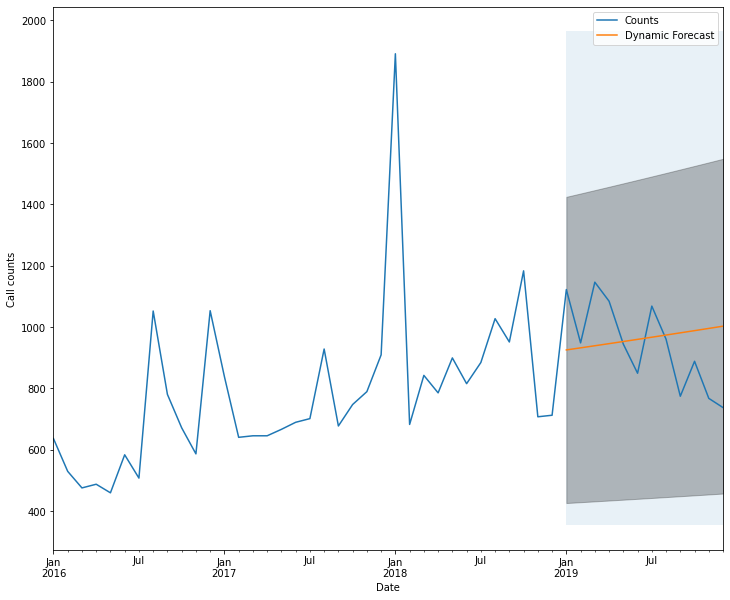

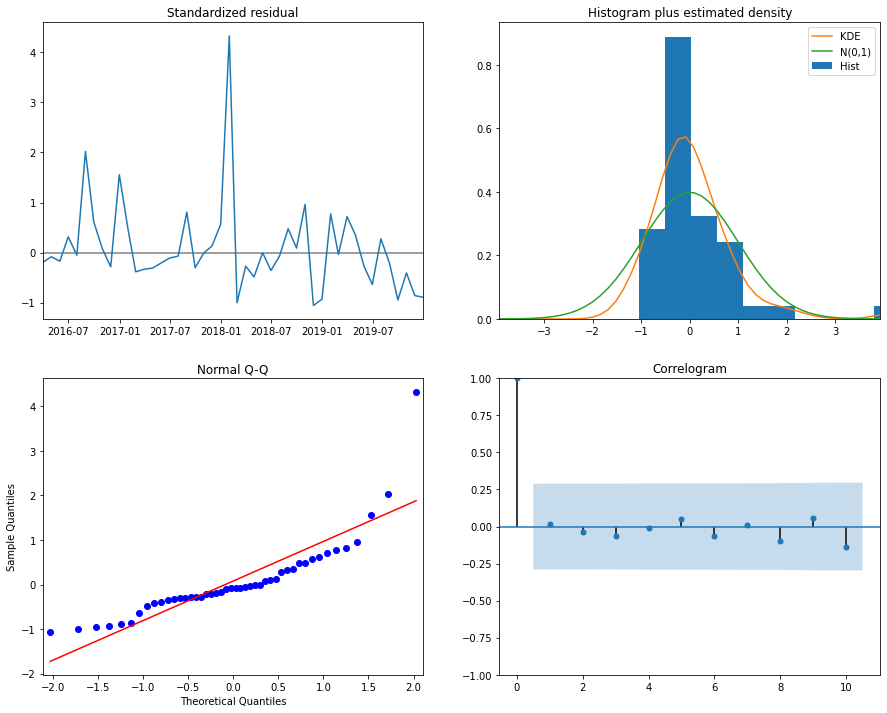

RMSE of forecasts is: 140.2761


In [0]:
SARIMAX_validation(1,0,1,0,0,0,Water_ts, Season=12)

SARIMAX(1, 0, 0)X(0, 0, 0, 12)



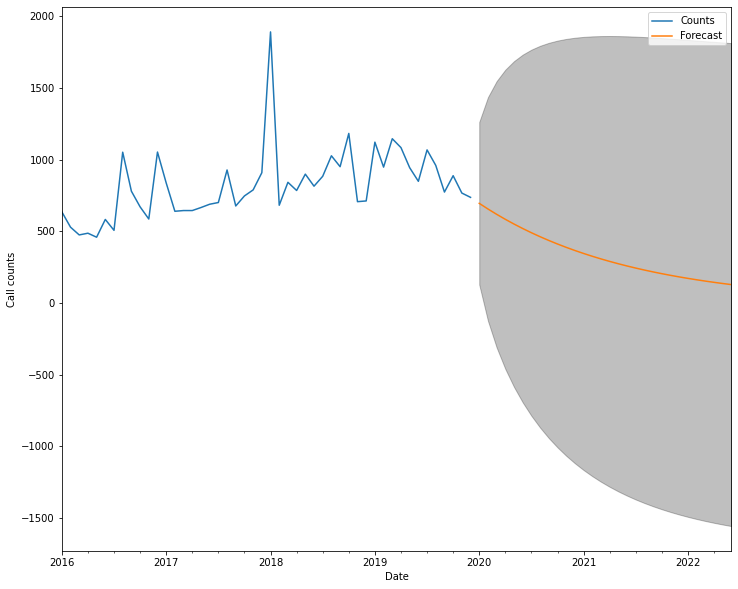

In [0]:
SARIMAX_forecast(1,0,0,0,0,0,Water_ts)

#### Trees

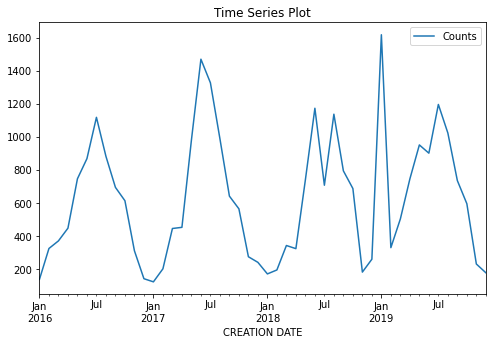

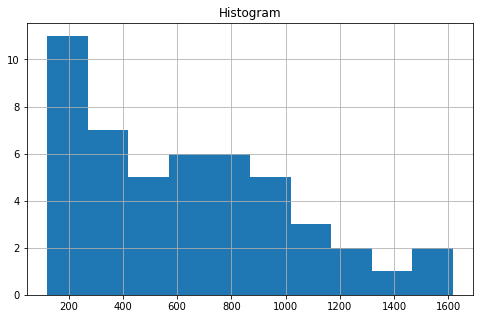

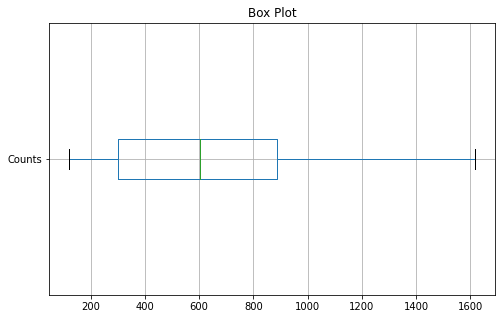

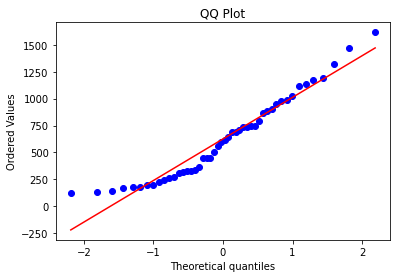

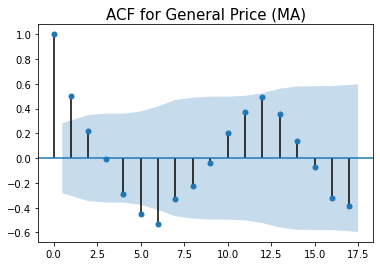

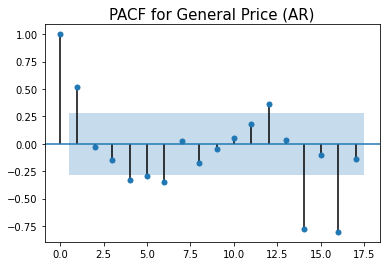

Central of tendency:
Mean      : 625.3541666666666
Median    : 603.0

ADF Statistic: -4.976010
p-value: 0.000025
Critical Values:
	 1%: -3.597
	 5%: -2.933
	10%: -2.605

** Reject the null hypothesis. Data has no unit root and is stationary **


In [0]:
adf_test(Trees_ts)

In [0]:
find_orders(Trees_ts)

((0, 0, 0), (0, 1, 0, 12))

SARIMAX(0, 0, 0)X(0, 1, 0, 12)

                            Statespace Model Results                            
Dep. Variable:                   Counts   No. Observations:                   48
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -252.804
Date:                  Thu, 19 Mar 2020   AIC                            507.607
Time:                          13:01:08   BIC                            509.163
Sample:                      01-31-2016   HQIC                           508.144
                           - 12-31-2019                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.097e+05   1.15e+04      9.523      0.000    8.71e+04    1.32e+05
Ljung-Box (Q):                         nan   Jarque-Bera (JB):               103.18

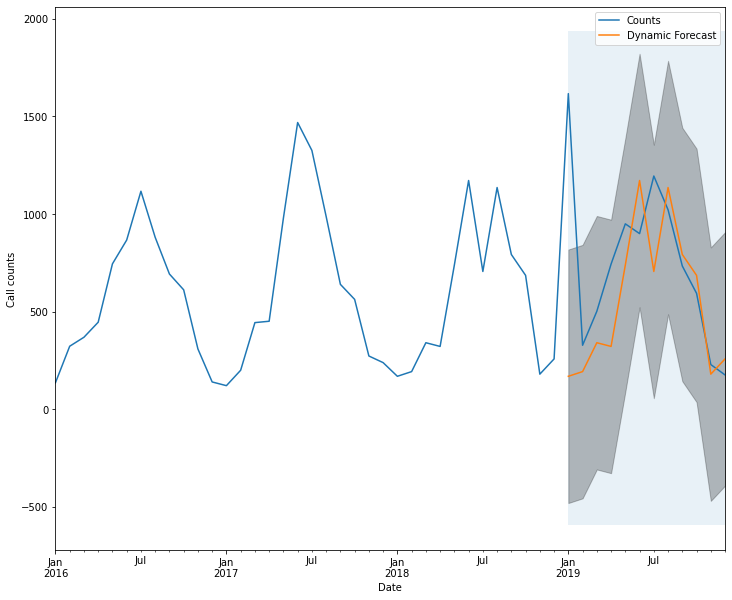

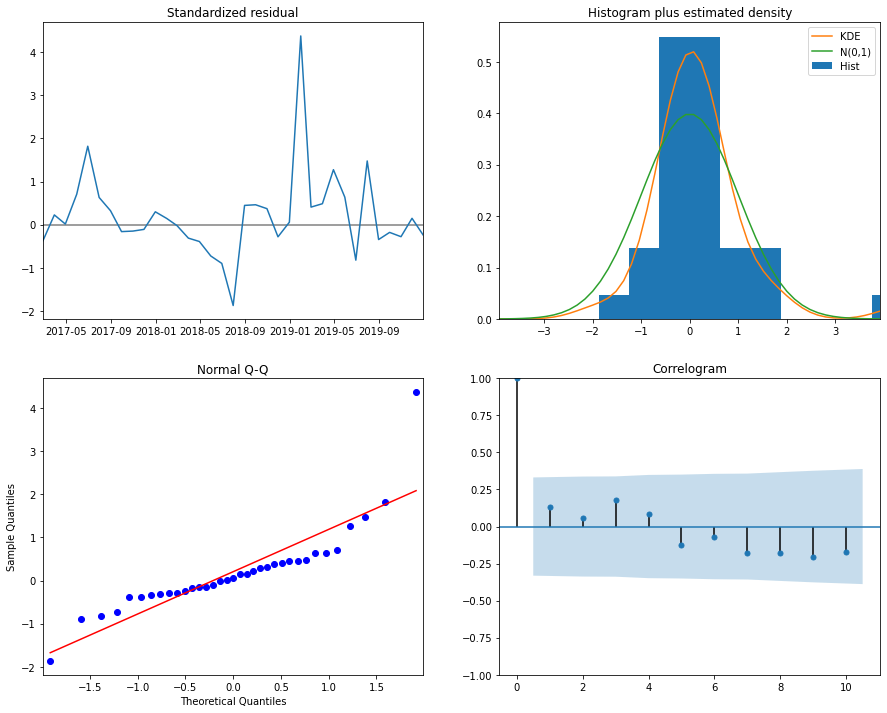

RMSE of forecasts is: 566.2887


In [0]:
SARIMAX_validation(0,0,0,0,1,0,Trees_ts)

SARIMAX(0, 0, 0)X(0, 1, 0, 12)



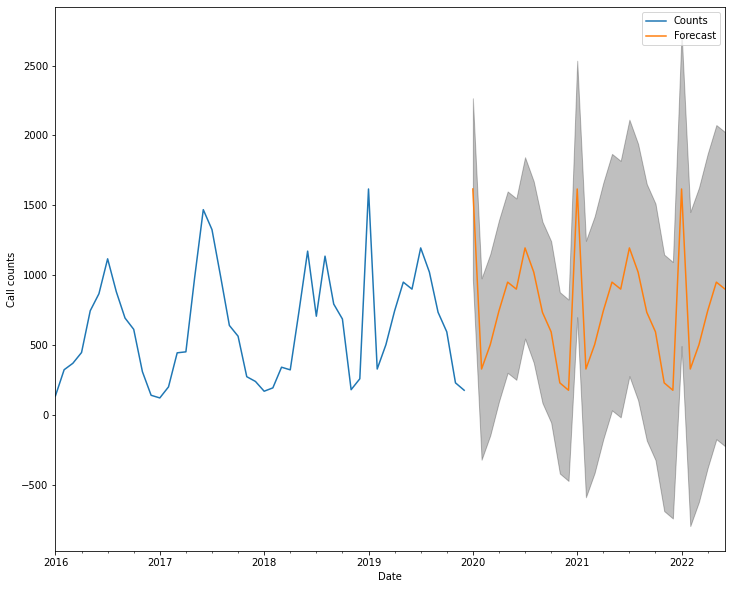

In [0]:
SARIMAX_forecast(0,0,0,0,1,0,Trees_ts)

#### Others

In [0]:
%%script false 
adf_test()

In [0]:
%%script false 
find_orders()

In [0]:
%%script false 
SARIMAX_validation()

In [0]:
%%script false 
SARIMAX_forecast()